# Supervised Learning Capstone Project (Focus on Tree Methods)


## Task: Create a model to predict whether or not a customer will Churn .




### Imports and Read in the Data

**The data file is "Telco-Customer-Churn.csv"**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\Telco-Customer-Churn.csv")

In [4]:
df.shape

(7032, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**Confirm the datatypes and non-null values in your dataframe.**

In [6]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  EDA

**Confirm that there are no NaN cells by displaying NaN values per feature column.**

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

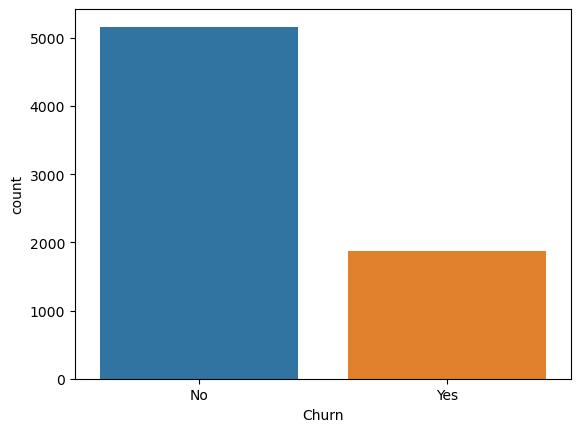

In [8]:
sns.countplot(data=df, x='Churn')

**Explore the distrbution of TotalCharges between Churn categories.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

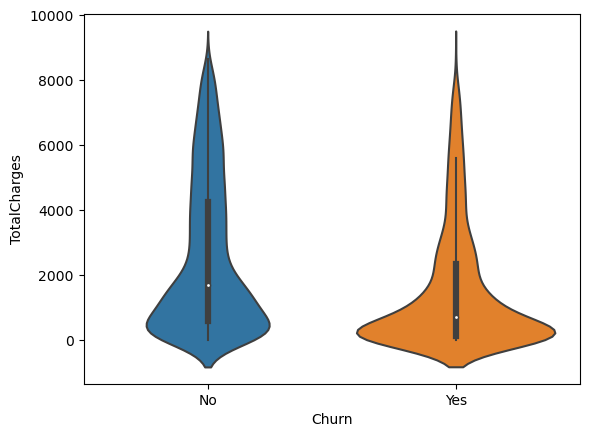

In [9]:
sns.violinplot(data=df, x='Churn', y = 'TotalCharges')

**Show the distribution of TotalCharges per Contract type,with churn as hue**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

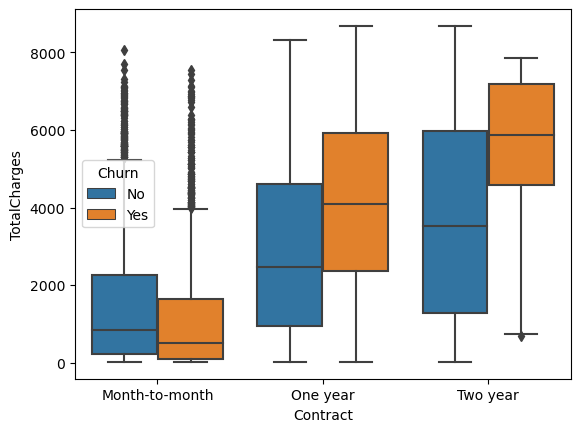

In [10]:
sns.boxplot(data=df, y = 'TotalCharges', x = 'Contract', hue = 'Churn')

<img src='fig3.png' >

**Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature. Feature like CustomerID is not useful for us***

In [14]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [15]:
corr_df.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes'

<Axes: >

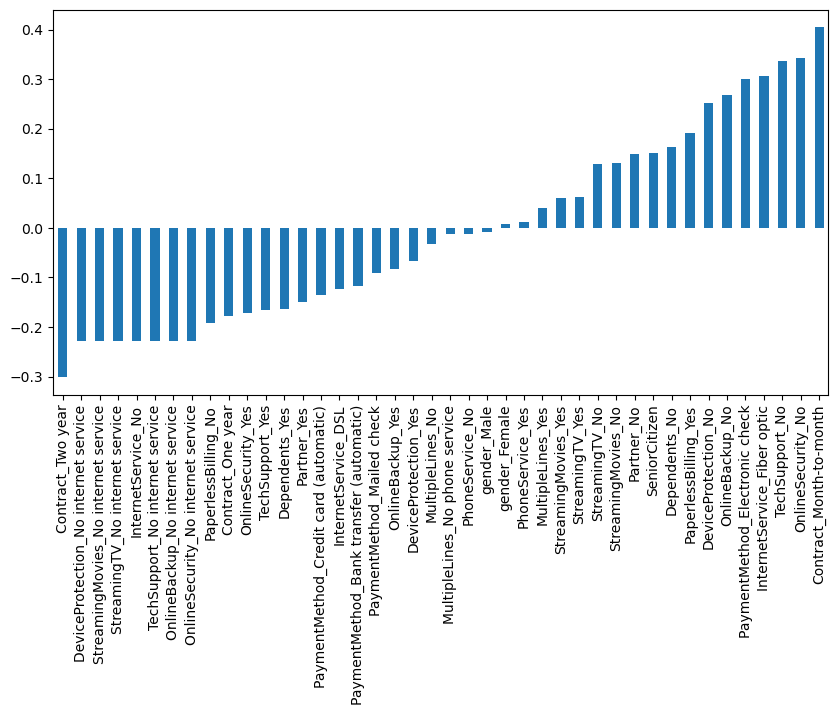

In [20]:
plt.figure(figsize=(10,5))
corr_df['Churn_Yes'].sort_values().iloc[1:-1].plot(kind='bar')

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis



**What are the 3 contract types available?**

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Create a histogram displaying the distribution of 'tenure' column.**

<Axes: xlabel='tenure', ylabel='Count'>

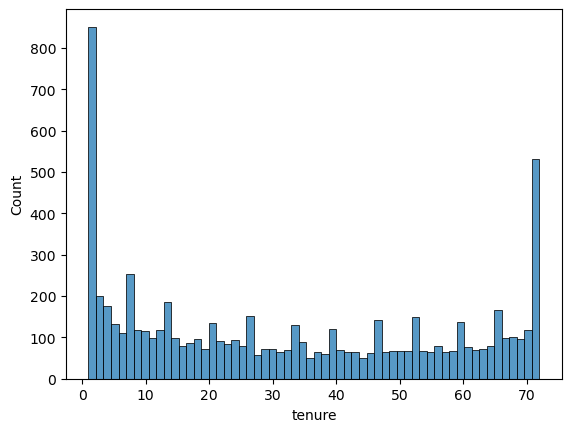

In [23]:
sns.histplot(data=df,x='tenure', bins = 60)

**Create histograms separated by: Churn and Contract**

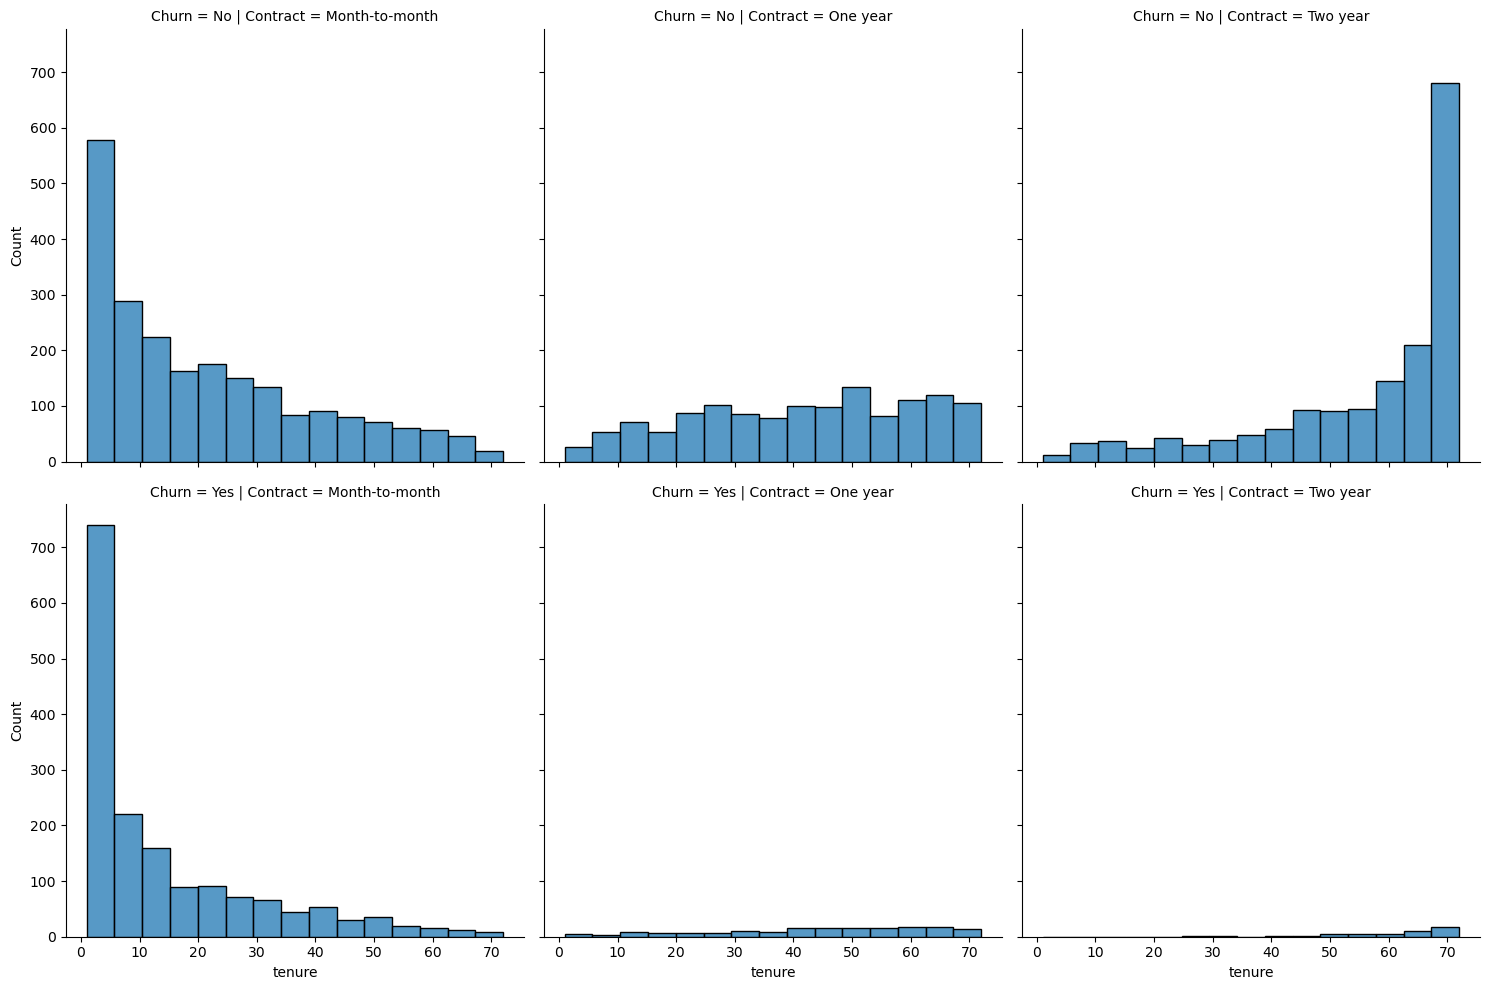

In [25]:
sns.displot(data=df,x='tenure',col='Contract',row='Churn')

<img src="fig6.png">

**Display a scatterplot of Total Charges vs Monthly Charges, and color hue by Churn.**

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<img src='fig7.png'>

**Taking each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [30]:
churn_no = df.groupby(['Churn','tenure']).count().transpose()['No']
churn_yes = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [34]:
churn_rate = 100*churn_yes/(churn_yes+churn_no)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**With Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<Axes: xlabel='tenure'>

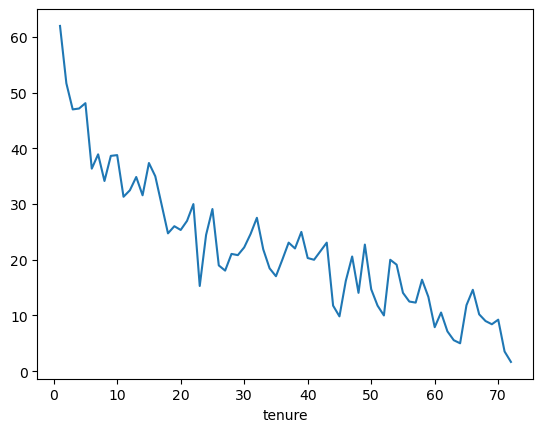

In [35]:
churn_rate.iloc[0].plot()

**Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

**Create a count plot showing the churn count per cohort.**

**Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

-----

# Part 4: Predictive Modeling

**Explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**Separate out the data into X features and Y label. Create dummy variables where necessary and drop features which are not useful**

In [37]:
X = df.drop(['Churn','customerID'],axis=1)
X= pd.get_dummies(X,drop_first=True)
y=df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=50)

**Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[436, 100],
       [ 89,  79]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.81      0.82       536
         Yes       0.44      0.47      0.46       168

    accuracy                           0.73       704
   macro avg       0.64      0.64      0.64       704
weighted avg       0.74      0.73      0.73       704



In [49]:
df1 = pd.DataFrame(data=dt.feature_importances_, index= X.columns, columns = ['Features_IMP'])
df1

,Features_IMP
SeniorCitizen,0.017505
tenure,0.192342
MonthlyCharges,0.187402
TotalCharges,0.208697
gender_Male,0.026543
Partner_Yes,0.023380
Dependents_Yes,0.016680
PhoneService_Yes,0.001341
MultipleLines_No phone service,0.003452
MultipleLines_Yes,0.017621


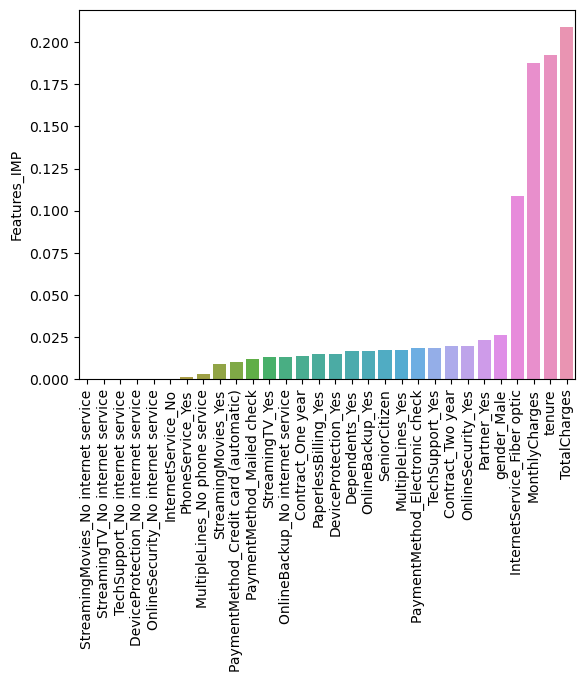

In [62]:
sns.barplot(data = df1.sort_values('Features_IMP'),x=df1.sort_values('Features_IMP').index,y='Features_IMP')
plt.xticks(rotation=90);

In [42]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

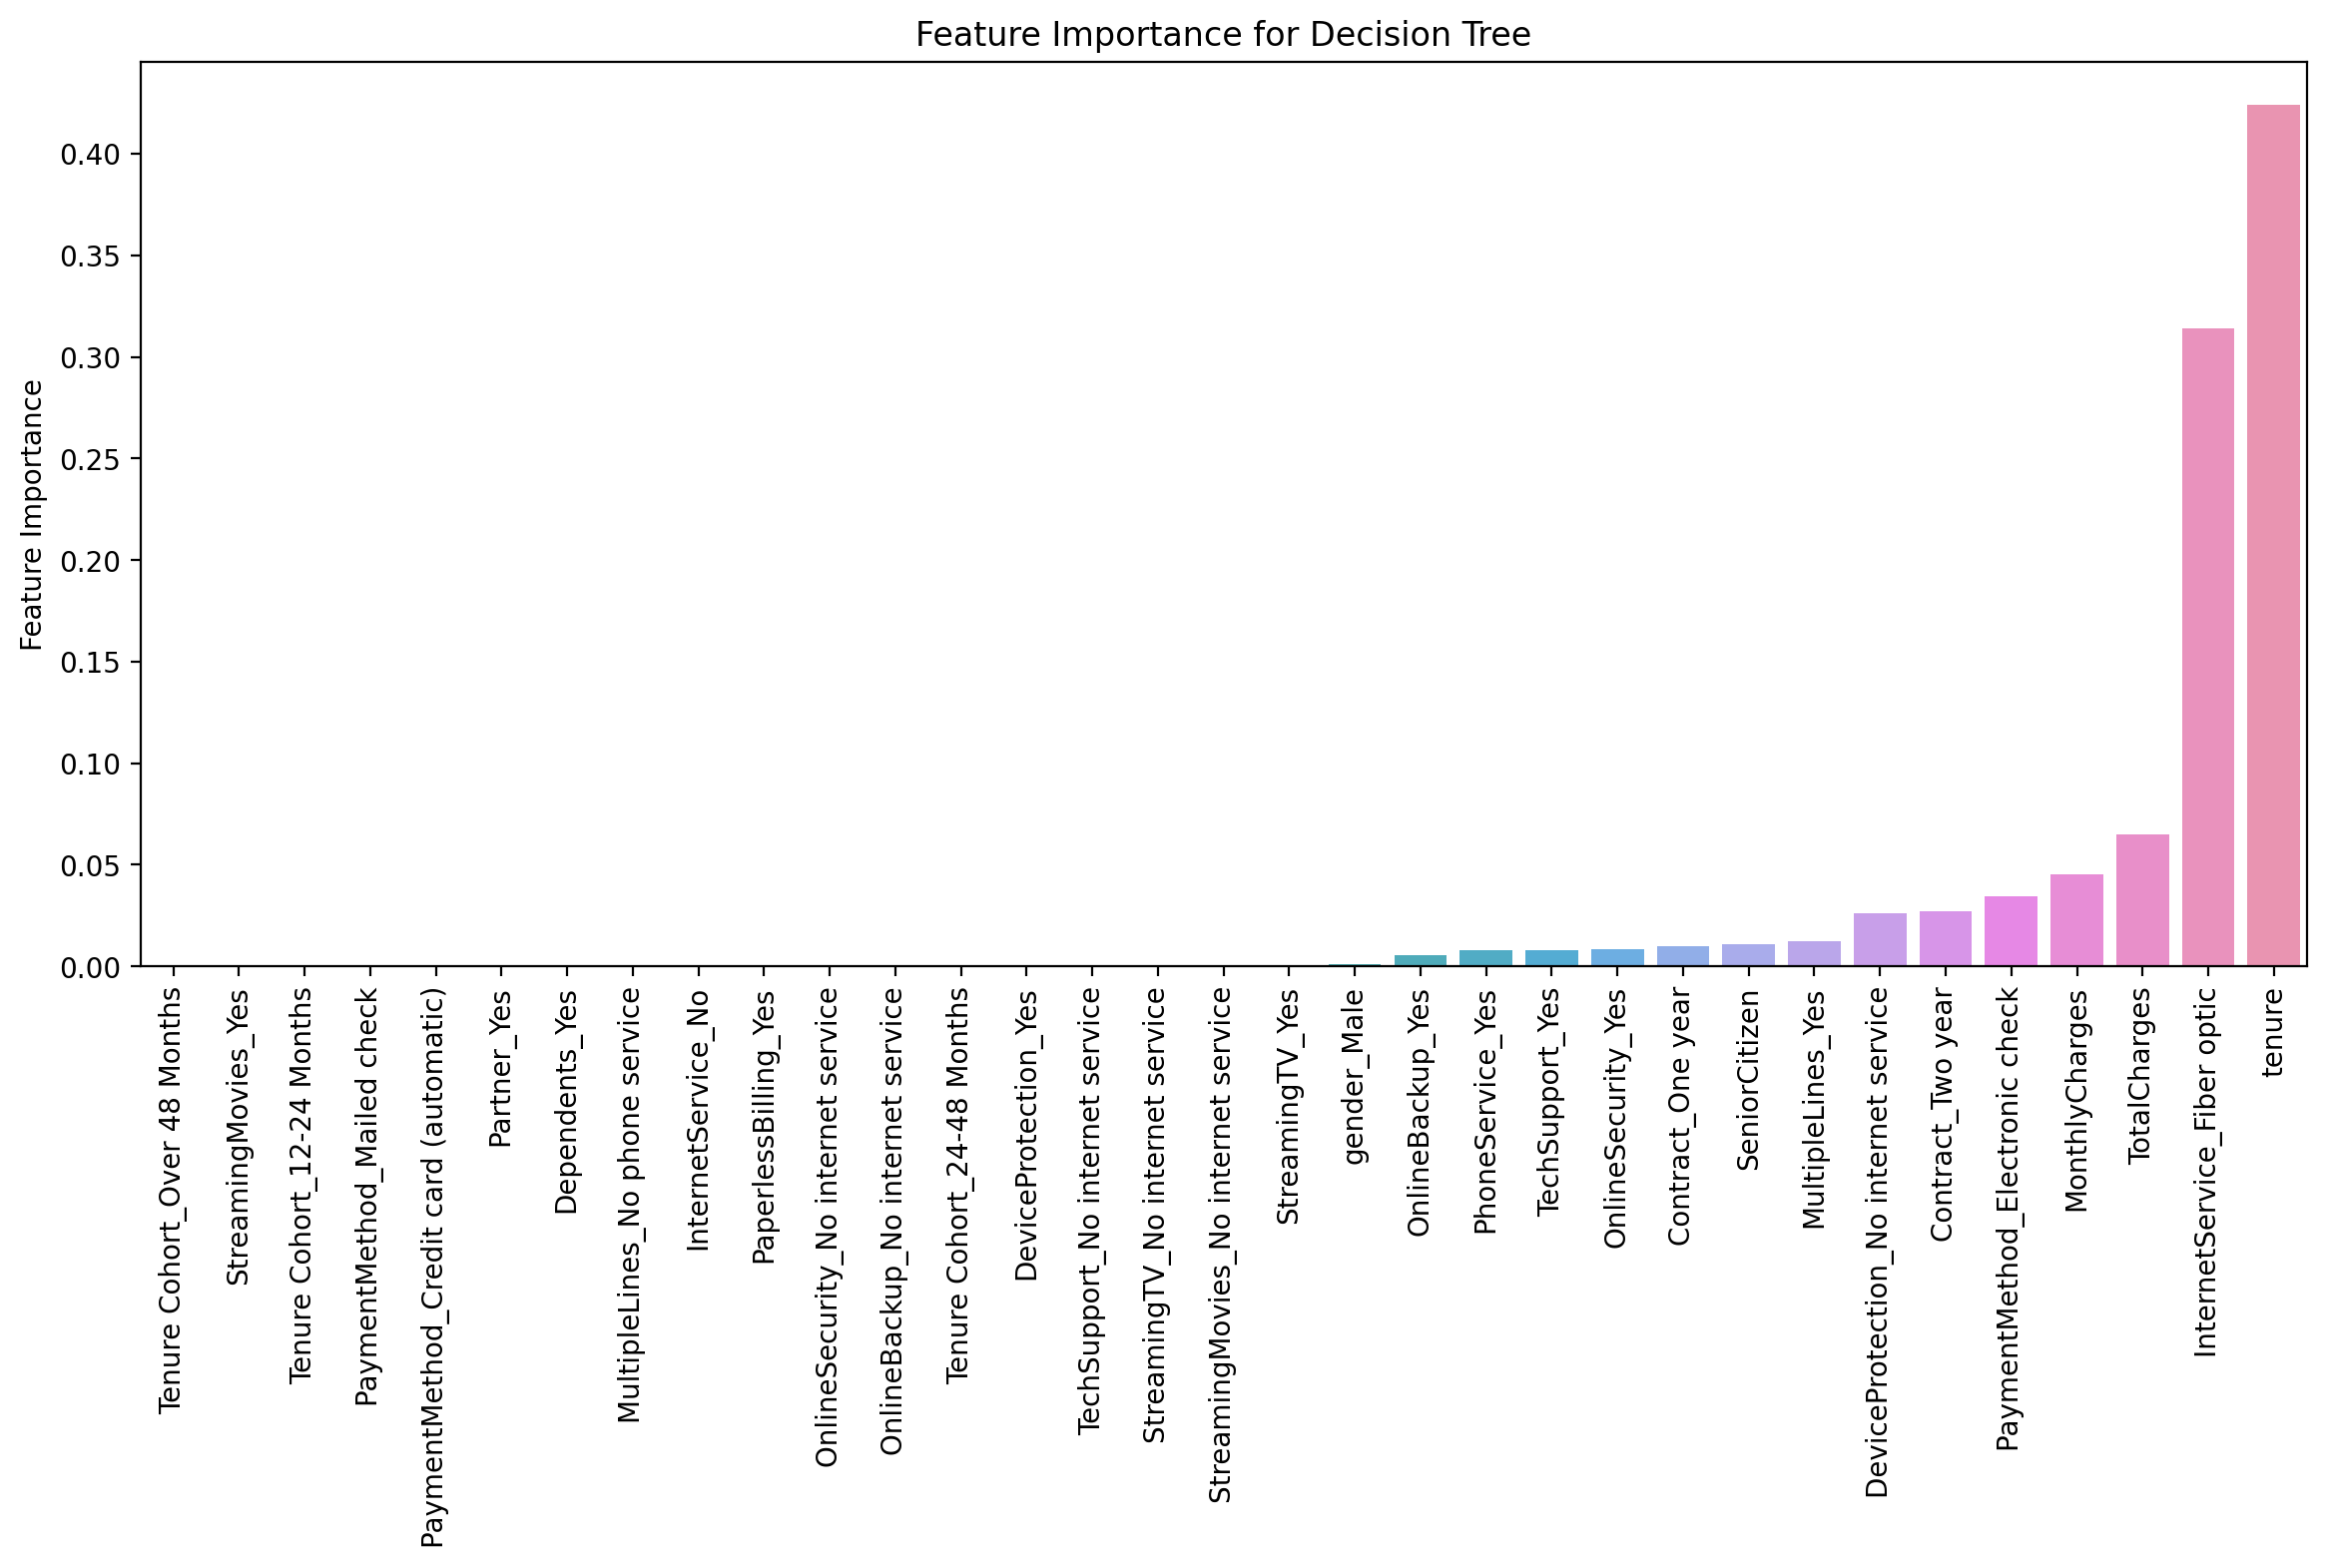

## Random Forest



In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       536
         Yes       0.58      0.49      0.53       168

    accuracy                           0.79       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.78      0.79      0.79       704



In [53]:
confusion_matrix(y_test,y_pred_rf)

array([[476,  60],
       [ 86,  82]], dtype=int64)

## Boosted Trees


In [54]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

          No       0.87      0.88      0.88       536
         Yes       0.61      0.58      0.59       168

    accuracy                           0.81       704
   macro avg       0.74      0.73      0.74       704
weighted avg       0.81      0.81      0.81       704



In [55]:
confusion_matrix(y_test,y_pred_ada)

array([[474,  62],
       [ 71,  97]], dtype=int64)

**which model performed best for you?**


###### (Feel free to use other models, Grid Search, Elbow Methods or anything you learned as part of this course)